In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os
import shutil

# Google Drive shared file path
gdrive_path = "/content/drive/MyDrive/CT.zip"  # Change if you renamed or moved the file

# Copy the ZIP file to current directory and extract it
shutil.copy(gdrive_path, "/content/CT.zip")

# Extract the ZIP file
with zipfile.ZipFile("/content/CT.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

# List the extracted folders
print("Available folders:")
print(os.listdir("/content/CT/Brain_Stroke_CT_Dataset"))

Available folders:
['Normal', 'External_Test', 'Hemorrhagic', 'Ischemia']


In [ ]:
import shutil
import os

# Move the External_Test folder outside the classification folder
src = "/content/CT/Brain_Stroke_CT_Dataset/External_Test"
dst = "/content/CT/External_Test"

# Only if it exists
if os.path.exists(src):
    shutil.move(src, dst)
    print("External_Test moved successfully.")
else:
    print("External_Test folder not found or already moved.")

# Confirm final folders inside the classification folder
print("Current folders inside the classification dataset:")
print(os.listdir("/content/CT/Brain_Stroke_CT_Dataset"))

External_Test moved successfully.
Current folders inside the classification dataset:
['Normal', 'Hemorrhagic', 'Ischemia']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "/content/CT/Brain_Stroke_CT_Dataset"
img_size = (128, 128)
batch_size = 32

# تقسيم البيانات: 80% تدريب و 20% تحقق
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

Found 7099 images belonging to 3 classes.
Found 1774 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(input_shape=img_size + (3,), include_top=False, weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')  # 3 classes: Normal, Hemorrhagic, Ischemic
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Increased training epochs from 10 to 30
history = model.fit(train_gen, validation_data=val_gen, epochs=30)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.6646 - loss: 0.8017

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


222/222 ━━━━━━━━━━━━━━━━━━━━ 156s 669ms/step - accuracy: 0.6649 - loss: 0.8011 - val_accuracy: 0.8754 - val_loss: 0.3356
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 153s 692ms/step - accuracy: 0.8055 - loss: 0.4904 - val_accuracy: 0.8670 - val_loss: 0.3294
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 655ms/step - accuracy: 0.8403 - loss: 0.4100 - val_accuracy: 0.8963 - val_loss: 0.2907
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 145s 656ms/step - accuracy: 0.8568 - loss: 0.3709 - val_accuracy: 0.9200 - val_loss: 0.2221
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 214s 711ms/step - accuracy: 0.8755 - loss: 0.3211 - val_accuracy: 0.9267 - val_loss: 0.2024
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 169s 760ms/step - accuracy: 0.8866 - loss: 0.2860 - val_accuracy: 0.9262 - val_loss: 0.2012
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 158s 711ms/step - accuracy: 0.9059 - loss: 0.2514 - val_accuracy: 0.9448 - val_loss: 0.1482
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 190s 659ms/step - accuracy: 0.9150 - loss: 0.22

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

In [ ]:
# Collect all predictions and true labels from the full validation set
y_true_labels = []
y_pred_labels = []

for i in range(len(val_gen)):
    X_batch, y_batch = val_gen[i]
    y_pred = model.predict(X_batch)

    y_true_labels.extend(np.argmax(y_batch, axis=1))
    y_pred_labels.extend(np.argmax(y_pred, axis=1))

# Convert lists to NumPy arrays
y_true_labels = np.array(y_true_labels)
y_pred_labels = np.array(y_pred_labels)

# Get class names from the generator
class_names = list(val_gen.class_indices.keys())

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 651ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 734ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 637ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 579ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

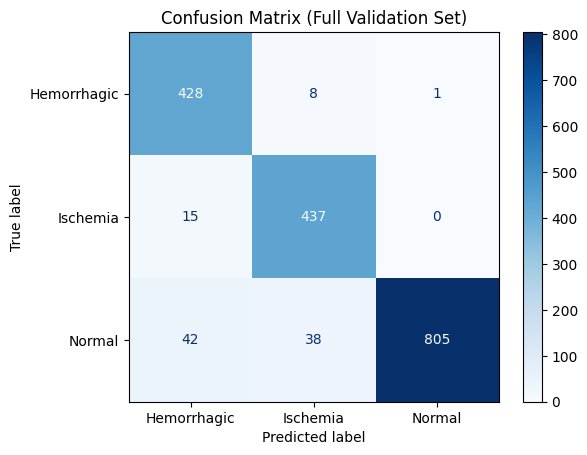

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix (Full Validation Set)")
plt.grid(False)
plt.show()

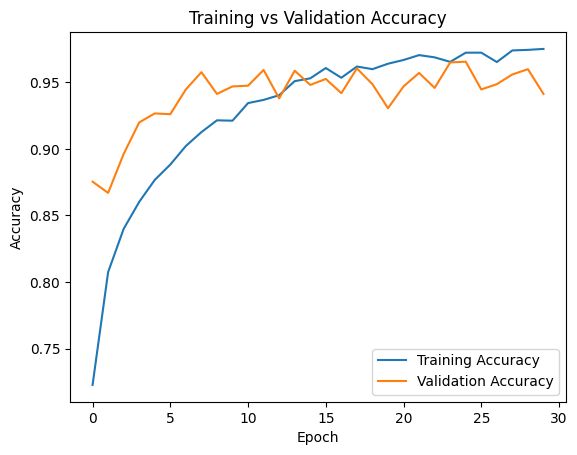

Best Training Accuracy: 97.52%
Best Validation Accuracy: 96.56%


In [ ]:
import matplotlib.pyplot as plt

# رسم المنحنيات
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

# أفضل القيم
best_train_acc = max(history.history['accuracy']) * 100
best_val_acc = max(history.history['val_accuracy']) * 100

print(f"Best Training Accuracy: {best_train_acc:.2f}%")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step


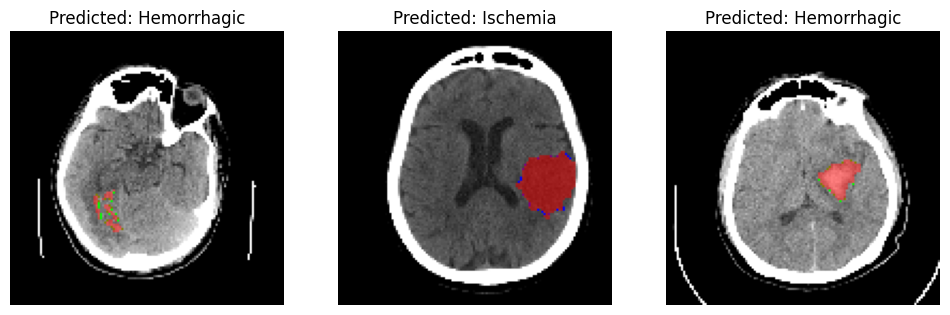

In [ ]:
import numpy as np
class_names = list(train_gen.class_indices.keys())

def show_predictions(model, generator, num_images=3):
    images, labels = next(generator)
    preds = model.predict(images)

    plt.figure(figsize=(12, 4))
    shown = 0
    for i in range(len(images)):
        true_label = np.argmax(labels[i])
        pred_label = np.argmax(preds[i])
        if true_label == pred_label and shown < num_images:
            plt.subplot(1, num_images, shown + 1)
            plt.imshow(images[i])
            plt.axis('off')
            plt.title(f"Predicted: {class_names[pred_label]}")
            shown += 1
        if shown == num_images:
            break
    plt.show()

show_predictions(model, val_gen)

In [ ]:
# Save model after training
model.save("/content/ct_model.h5")
print("✅ Model saved as ct_model.h5")

✅ Model saved as ct_model.h5


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

# Copy to Google Drive
shutil.copy("/content/ct_model.h5", "/content/drive/MyDrive/ct_model.h5")
print("✅ Model copied to Google Drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Model copied to Google Drive
